In [1]:
# Data wrangling
import numpy as np
from utils import mnist_reader

# Data viz
import plotly.express as px
from gtda.plotting import plot_point_cloud

# TDA magic
from gtda.mapper import (
    CubicalCover, # cover of the target
    make_mapper_pipeline,
    Projection, # our filter function
    plot_static_mapper_graph,
    plot_interactive_mapper_graph
)

# ML tools
from sklearn.cluster import DBSCAN # cluster algo
from sklearn.decomposition import PCA 

In [2]:
x_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
x_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

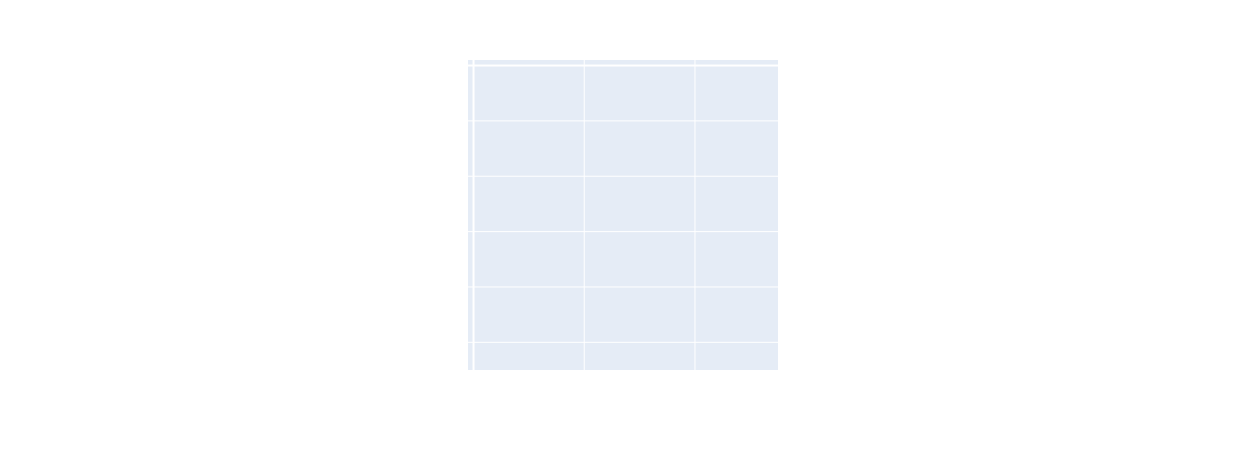

In [18]:
img = x_train[59907].reshape((28,28))
fig = px.imshow(img, color_continuous_scale='gray')
fig.update_layout(coloraxis_showscale=False)
fig.update_xaxes(showticklabels=False)
fig.update_yaxes(showticklabels=False)
fig.show()

In [4]:
# get small slice of data to play with
fashion_data = np.array(x_train)
fashion_answer = np.array(y_train)
fashion_answer = fashion_answer.reshape(-1,1)
idx = np.random.randint(60000, size=1000)
viz_data = fashion_data[idx,:]
viz_answer = fashion_answer[idx,:]

In [5]:
# Define filter function - can be any scikit-learn transformer
# filter_func = Projection(columns=[294, 576])
filter_func = PCA(n_components=6)
filter_func.fit(fashion_data)
print(filter_func.explained_variance_ratio_)

[0.29039228 0.1775531  0.06019222 0.04957428 0.03847655 0.03460769]


In [6]:
# Define filter function - can be any scikit-learn transformer
# filter_func = Projection(columns=[294, 576])
filter_func = PCA(n_components=6)

# Define cover
cover = CubicalCover(n_intervals=2, overlap_frac=0.0005)

# Choose clustering algorithm - default is DBSCAN
clusterer = DBSCAN(eps=0.1, metric='euclidean')

# Configure parallelism of clustering step
n_jobs = 12

# Initialise pipeline
pipe = make_mapper_pipeline(
    filter_func=filter_func,
    cover=cover,
    clusterer=clusterer,
    verbose=False,
    n_jobs=n_jobs,
)

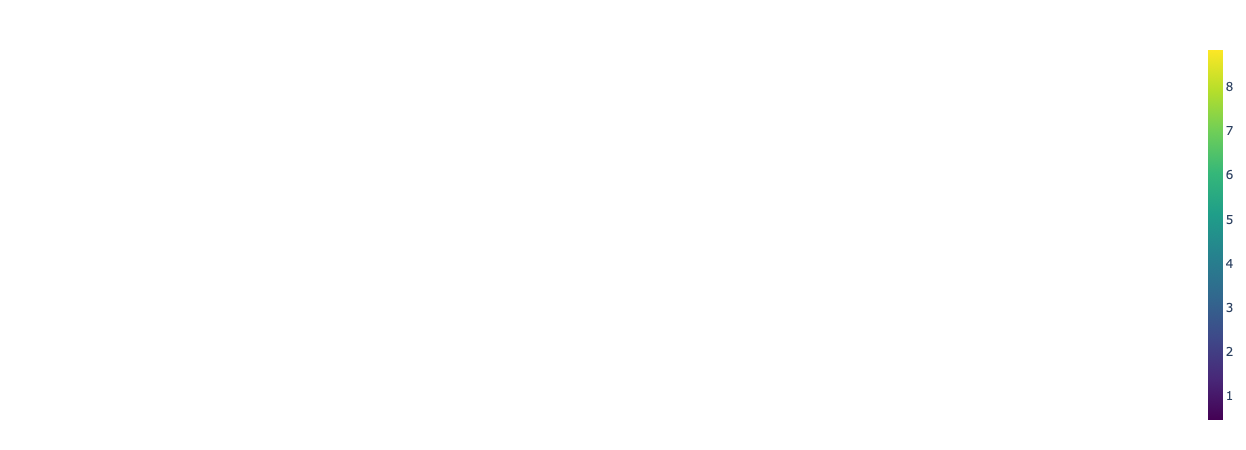

In [7]:
fig = plot_static_mapper_graph(pipe, fashion_data, layout_dim=3, node_scale=40, color_variable=fashion_answer)
fig.show(config={'scrollZoom': True})

In [9]:
node_elements = result['node_metadata']['node_elements']

In [20]:
result['node_metadata']

{'node_id': (0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62),
 'pullback_set_label': (0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62),
 'partial_cluster_label': (-1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,


In [12]:
node_elements[20]

array([    0,     9,    60, ..., 59907, 59970, 59978])

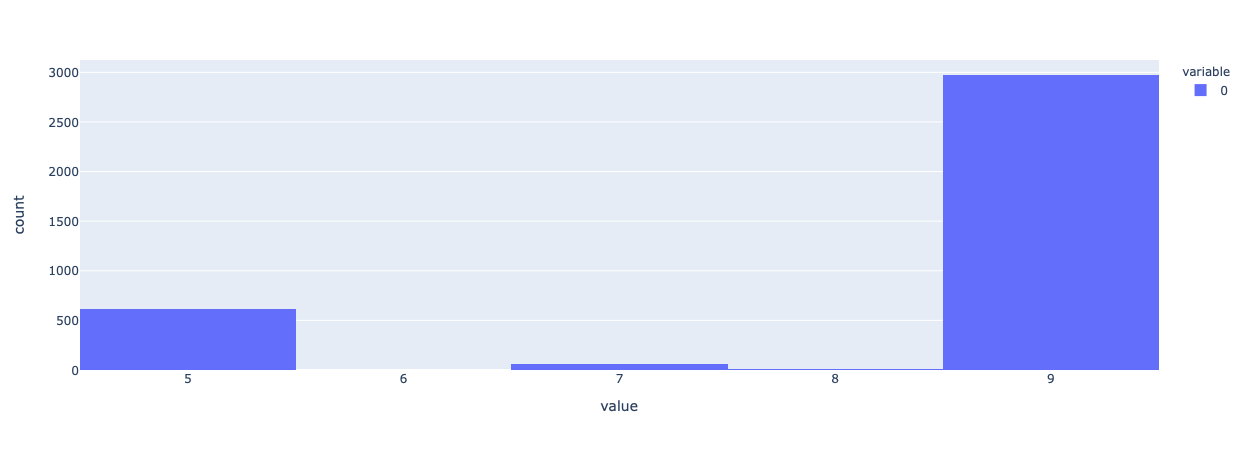

In [11]:
px.histogram(fashion_answer[node_elements[20]])

In [63]:
def point_cloud_from_vector(v, dim=5):
    points = []
    for i in range(len(v)-dim):
        points.append(v[i:i+dim])
    return points

In [64]:
feature_vect

array([0.94672932, 0.84828947, 0.37994134, 0.47508394, 0.83770113,
       0.79109452, 0.61987286, 0.91258959, 0.80488999, 0.98744068,
       0.01703893, 0.79217171, 0.66852524, 0.83740183, 0.20417201,
       0.7562643 , 0.28041383, 0.08212113, 0.22708205, 0.51890487])

In [65]:
points = np.array(point_cloud_from_vector(feature_vect, dim=3))

In [66]:
points

array([[0.94672932, 0.84828947, 0.37994134],
       [0.84828947, 0.37994134, 0.47508394],
       [0.37994134, 0.47508394, 0.83770113],
       [0.47508394, 0.83770113, 0.79109452],
       [0.83770113, 0.79109452, 0.61987286],
       [0.79109452, 0.61987286, 0.91258959],
       [0.61987286, 0.91258959, 0.80488999],
       [0.91258959, 0.80488999, 0.98744068],
       [0.80488999, 0.98744068, 0.01703893],
       [0.98744068, 0.01703893, 0.79217171],
       [0.01703893, 0.79217171, 0.66852524],
       [0.79217171, 0.66852524, 0.83740183],
       [0.66852524, 0.83740183, 0.20417201],
       [0.83740183, 0.20417201, 0.7562643 ],
       [0.20417201, 0.7562643 , 0.28041383],
       [0.7562643 , 0.28041383, 0.08212113],
       [0.28041383, 0.08212113, 0.22708205]])

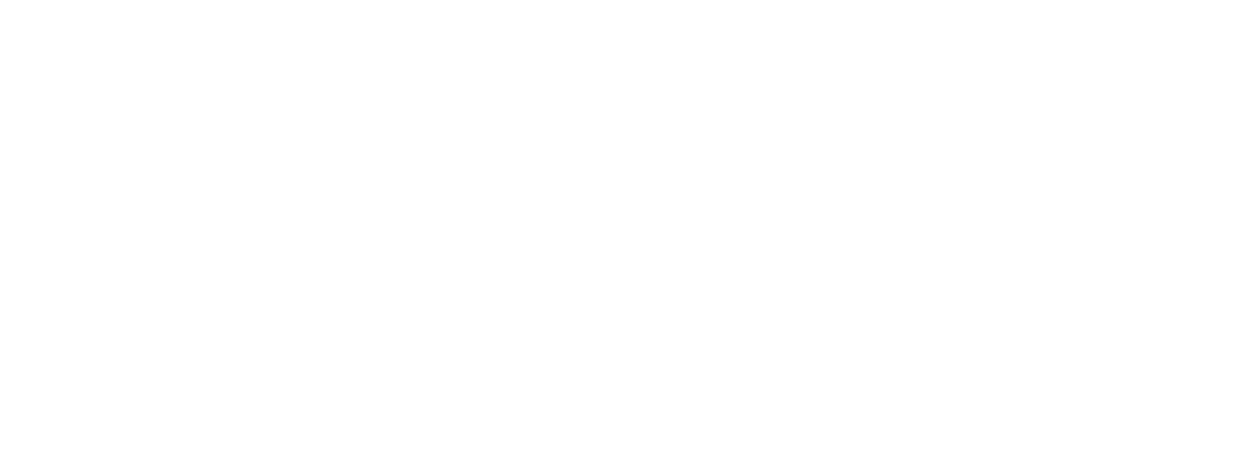

In [67]:
plot_point_cloud(points)

In [68]:
from gtda.homology import VietorisRipsPersistence

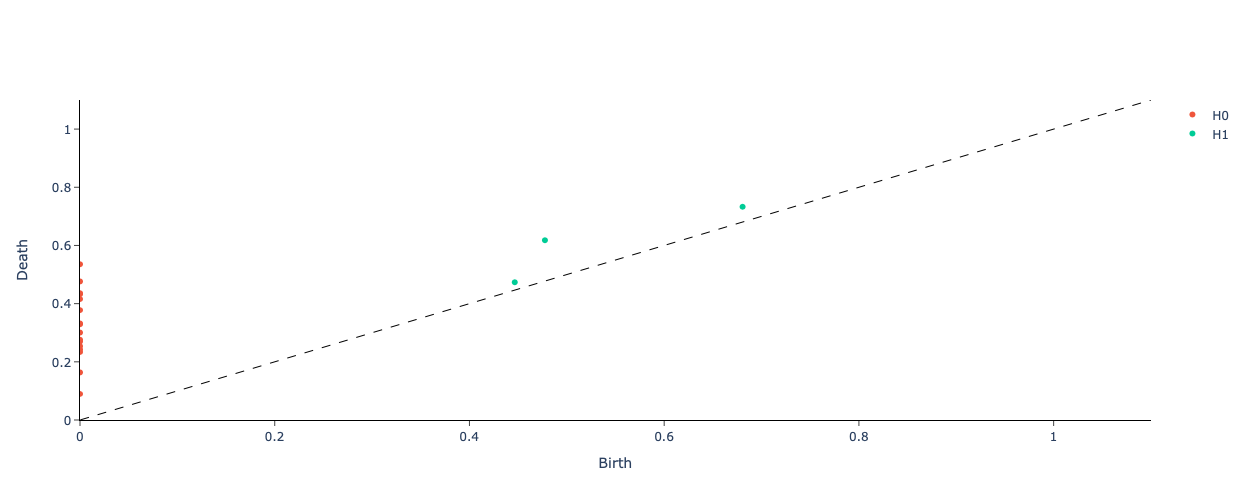

array([[[0.        , 0.08956235, 0.        ],
        [0.        , 0.16359226, 0.        ],
        [0.        , 0.23365588, 0.        ],
        [0.        , 0.24252792, 0.        ],
        [0.        , 0.25380114, 0.        ],
        [0.        , 0.26967674, 0.        ],
        [0.        , 0.27590904, 0.        ],
        [0.        , 0.30051842, 0.        ],
        [0.        , 0.32925811, 0.        ],
        [0.        , 0.33177674, 0.        ],
        [0.        , 0.37777707, 0.        ],
        [0.        , 0.41568512, 0.        ],
        [0.        , 0.43236396, 0.        ],
        [0.        , 0.43603083, 0.        ],
        [0.        , 0.47634166, 0.        ],
        [0.        , 0.53550661, 0.        ],
        [0.68053371, 0.73292643, 1.        ],
        [0.47751445, 0.61797869, 1.        ],
        [0.44653013, 0.47355357, 1.        ]]])

In [69]:
vr = VietorisRipsPersistence()
vr.fit_transform_plot([points])